In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\adity\Documents\Python Script\EDA\Car.csv")

In [ ]:
df.head() # Displaying the first 5 rows of the dataset 

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df.info()  # Displaying the information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [5]:
df.shape  # Displaying the shape of the dataset

(7253, 14)

In [ ]:
df.nunique() # Displaying the unique values of the dataset

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               450
Engine                150
Power                 386
Seats                   9
New_Price             625
Price                1373
dtype: int64

In [7]:
df.isna().sum() # Displaying the missing values of the dataset

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                  46
Seats                  53
New_Price            6247
Price                1234
dtype: int64

In [8]:
(df.isnull().sum()/(len(df)))*100 # Displaying the percentage of missing values of the dataset

S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Mileage               0.027575
Engine                0.634220
Power                 0.634220
Seats                 0.730732
New_Price            86.129877
Price                17.013650
dtype: float64

In [9]:
df.duplicated().sum() # Displaying the number of duplicate values in the dataset

np.int64(0)

In [10]:
data=df.drop(['S.No.','New_Price'],axis=1) # Dropping the columns which are not required

In [11]:
data['Price'].fillna(data['Price'].mean(),inplace=True) # Filling the missing values with the mean of the column

In [12]:
data.dropna(subset=['Seats','Mileage'],inplace=True) # Dropping the missing values of the columns

In [13]:
data.isna().sum() # Displaying the missing values of the dataset

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [14]:
data.head() # Displaying the first 5 rows of the dataset

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [15]:
data[['Power (bhp)','Unit']]=data['Power'].str.split(' ',expand=True) # Splitting the column into two columns
data['Power (bhp)'].replace({'null':'0'},inplace=True)  # Replacing the null values with 0
data['Power (bhp)']=data['Power (bhp)'].astype('float') # Converting the column into float  

In [16]:
data[['Engine (CC)','Unit']]=data['Engine'].str.split(' ',expand=True) # Splitting the column into two columns
data['Engine (CC)']=data['Engine (CC)'].astype(int) # Converting the column into integer

In [17]:
data[['Mileage (kmpl)','Unit']]=data['Mileage'].str.split(' ',expand=True) # Splitting the column into two columns
data['Mileage (kmpl)']=data['Mileage (kmpl)'].astype(float) # Converting the column into float

In [18]:
data.drop('Unit',axis=1,inplace=True) # Dropping the column which is not required

In [19]:
date.today().year # Getting the current year

2025

In [20]:
data['Car_Age']=date.today().year-data['Year'] # Creating a new column

In [21]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (bhp),Engine (CC),Mileage (kmpl),Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16,998,26.60,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.20,1582,19.67,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.70,1199,18.20,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76,1248,20.77,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.80,1968,15.20,12


In [ ]:
data['Brand']=data.Name.str.split().str.get(0) # Splitting the column into two columns
data['Model']=data.Name.str.split().str.get(1)+' '+data.Name.str.split().str.get(2) # Splitting the column into two columns
data[['Name','Brand','Model']] # Displaying the columns

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,Wagon R
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta 1.6
2,Honda Jazz V,Honda,Jazz V
3,Maruti Ertiga VDI,Maruti,Ertiga VDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4 New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,Vento Diesel
7249,Volkswagen Polo GT TSI,Volkswagen,Polo GT
7250,Nissan Micra Diesel XV,Nissan,Micra Diesel
7251,Volkswagen Polo GT TSI,Volkswagen,Polo GT


In [23]:
data['Brand'].unique() # Displaying the unique values of the column

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [24]:
searchfor=['Isuzu','ISUZU','Land','Mini'] # Searching for the values in the column
'|'.join(searchfor) # Joining the values

'Isuzu|ISUZU|Land|Mini'

In [ ]:
searchfor=['Isuzu','ISUZU','Land','Mini'] # Searching for the values in the column
data[data.Brand.str.contains('|'.join(searchfor))].head() # Displaying the values

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (bhp),Engine (CC),Mileage (kmpl),Car_Age,Brand,Model
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,27.00,187.70,2179,12.70,11,Land,Rover Range
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,17.50,115.00,2179,0.00,13,Land,Rover Freelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.6 kmpl,1998 CC,112 bhp,5.0,23.00,112.00,1998,16.60,8,Mini,Countryman Cooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.7 kmpl,2179 CC,187.7 bhp,5.0,55.76,187.70,2179,12.70,7,Land,Rover Range
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82 kmpl,1998 CC,189.08 bhp,4.0,35.67,189.08,1998,16.82,8,Mini,Cooper Convertible


In [26]:
data['Brand'].replace({"ISUZU":"Isuze","Mini":"Mini Cooper","Land":"Land Rover"},inplace=True) # Replacing the values in the column

In [27]:
data['Model'].nunique() # Displaying the unique values of the column

716

In [28]:
data['Model'].unique() # Displaying the unique values of the column 

array(['Wagon R', 'Creta 1.6', 'Jazz V', 'Ertiga VDI', 'A4 New',
       'EON LPG', 'Micra Diesel', 'Innova Crysta', 'Vento Diesel',
       'Indica Vista', 'Ciaz Zeta', 'City 1.5', 'Swift VDI',
       'Rover Range', 'Rover Freelander', 'Pajero Sport', 'Amaze S',
       'Swift DDiS', 'Duster 85PS', 'New C-Class', '3 Series', 'S Cross',
       'A6 2011-2015', 'i20 1.2', 'Vento Petrol', 'City Corporate',
       'Alto K10', 'WRV i-VTEC', 'Innova 2.5', 'Duster 110PS',
       'Corolla Altis', 'Ssangyong Rexton', 'A6 2.7', 'Vento 1.6',
       'Vitara Brezza', 'KUV 100', 'M-Class ML', 'Polo Diesel',
       'Alto LXi', 'Nano LX', 'i20 Magna', 'Elantra 2.0', 'Elantra CRDi',
       'Xcent 1.1', 'Thar CRDe', 'A4 2.0', 'Swift LDI', 'Swift Ldi',
       'Grand i10', 'Vento 2013-2015', 'KWID RXT', 'i10 Asta',
       'X-Trail SLX', 'Zen Estilo', 'Figo Diesel', 'Indica V2', 'City ZX',
       'C-Class Progressive', 'Ertiga SHVS', 'Creta 1.4',
       'Cayenne 2009-2014', 'XUV500 W8', 'i10 Sportz', 'Terrano

In [29]:
data['Model']=data['Model'].str.lower() # Converting the column into lower case

In [30]:
car_model=data['Model'].nunique() # Displaying the unique values of the column

In [31]:
car_model # Displaying the unique values of the column

695

In [32]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Power (bhp),Engine (CC),Mileage (kmpl),Car_Age,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,58.16,998,26.60,15,Maruti,wagon r
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,126.20,1582,19.67,10,Hyundai,creta 1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,88.70,1199,18.20,14,Honda,jazz v
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,88.76,1248,20.77,13,Maruti,ertiga vdi
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,140.80,1968,15.20,12,Audi,a4 new


In [33]:
data.drop(columns=['Mileage','Engine','Power'],axis=1,inplace=True) # Dropping the columns which are not required

In [34]:
data.shape  # Displaying the shape of the dataset

(7198, 15)

In [ ]:
data.describe().T # Displaying the summary statistics of the dataset

,count,mean,std,min,25%,50%,75%,max
Year,7198.0,2013.391081,3.235298,1996.00,2011.0000,2014.00,2016.000000,2019.00
Kilometers_Driven,7198.0,58631.777160,84694.798141,171.00,34000.0000,53253.00,73000.000000,6500000.00
Seats,7198.0,5.279800,0.811759,0.00,5.0000,5.00,5.000000,10.00
Price,7198.0,9.497879,10.209333,0.44,3.8725,6.75,9.479468,160.00
Power (bhp),7198.0,110.829464,55.044446,0.00,74.0000,91.72,138.030000,616.00
Engine (CC),7198.0,1616.900389,595.034653,624.00,1198.0000,1493.00,1968.000000,5998.00
Mileage (kmpl),7198.0,18.184266,4.504070,0.00,15.2150,18.19,21.100000,33.54
Car_Age,7198.0,11.608919,3.235298,6.00,9.0000,11.00,14.000000,29.00


In [ ]:
data.describe(include='object').T # Displaying the summary statistics of the dataset

,count,unique,top,freq
Name,7198,2015,Mahindra XUV500 W8 2WD,55
Location,7198,11,Mumbai,943
Fuel_Type,7198,4,Diesel,3838
Transmission,7198,2,Manual,5163
Owner_Type,7198,4,First,5921
Brand,7198,33,Maruti,1428
Model,7197,695,swift dzire,189


In [38]:
cat_cols=data.select_dtypes(include=['object']).columns.tolist() # Displaying the categorical variables
num_cols=data.select_dtypes(include=np.number).columns.tolist() # Displaying the numerical variables
print("categorical Variables:")
print(cat_cols)
print("Numberical variable:")
print(num_cols)

categorical Variables:
['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand', 'Model']
Numberical variable:
['Year', 'Kilometers_Driven', 'Seats', 'Price', 'Power (bhp)', 'Engine (CC)', 'Mileage (kmpl)', 'Car_Age']


Year


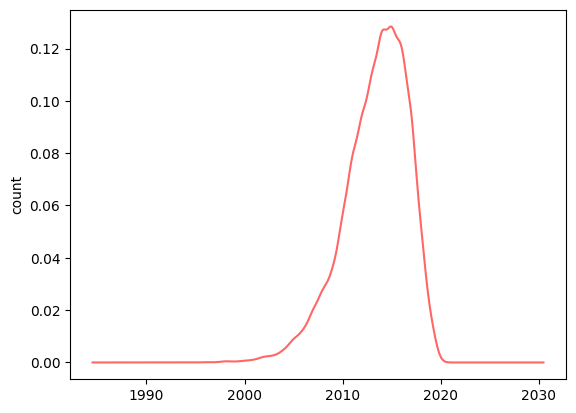

Kilometers_Driven


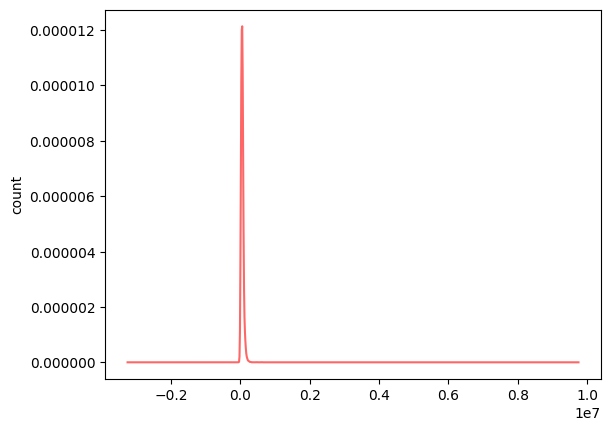

Seats


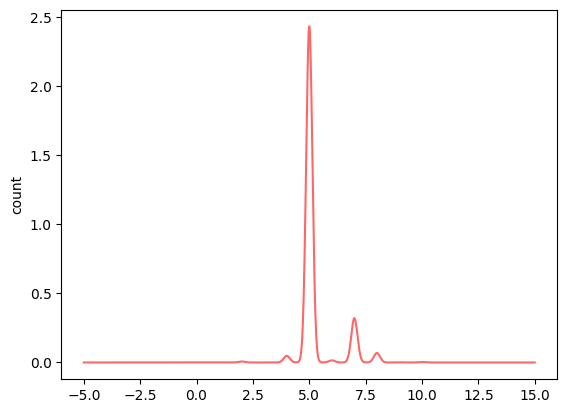

Price


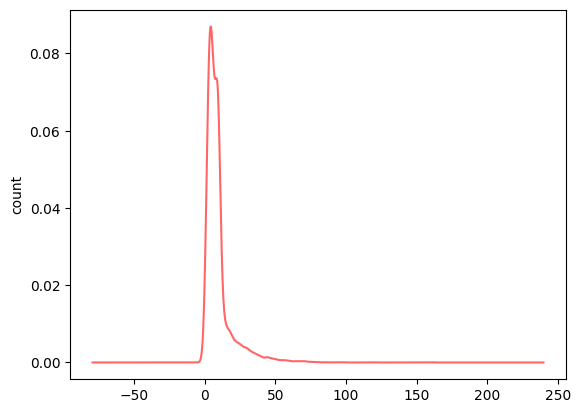

Power (bhp)


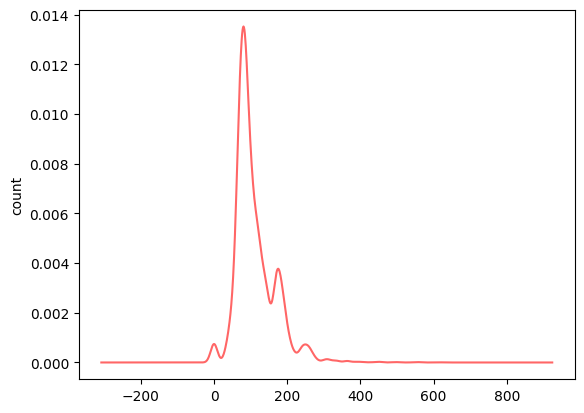

Engine (CC)


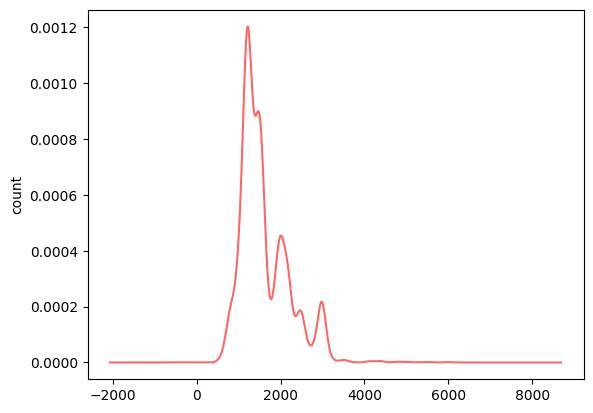

Mileage (kmpl)


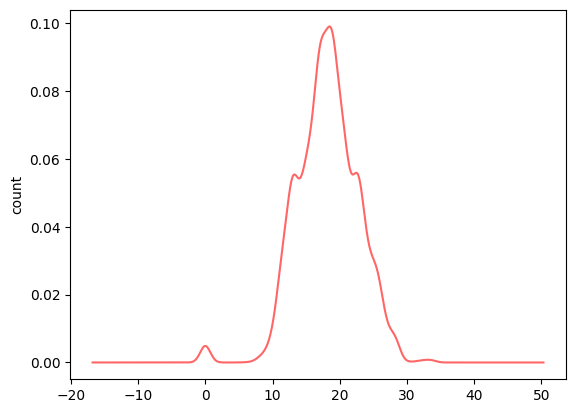

Car_Age


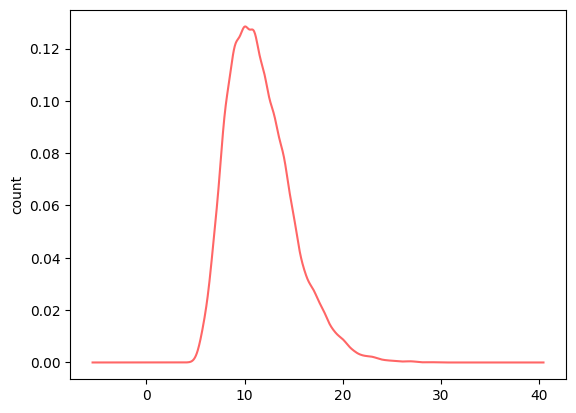

In [ ]:
for col in num_cols: # Displaying the boxplot of the numerical variables
    print(col)
    data[col].plot(kind='kde',alpha=0.6,color='red')
    plt.ticklabel_format(axis='y',style='plain')
    plt.ylabel('count')
    plt.show()

In [40]:
cat_cols=['Location','Fuel_Type','Transmission','Owner_Type','Brand','Model'] # Displaying the countplot of the categorical variables

Location


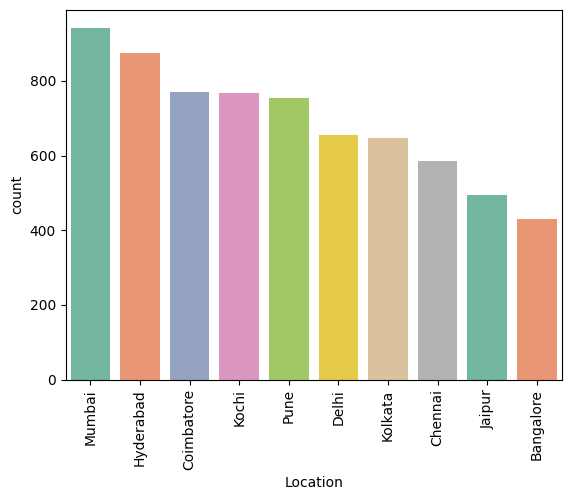

Fuel_Type


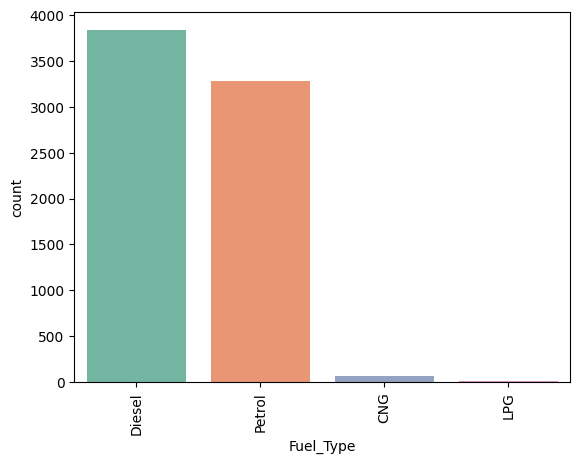

Transmission


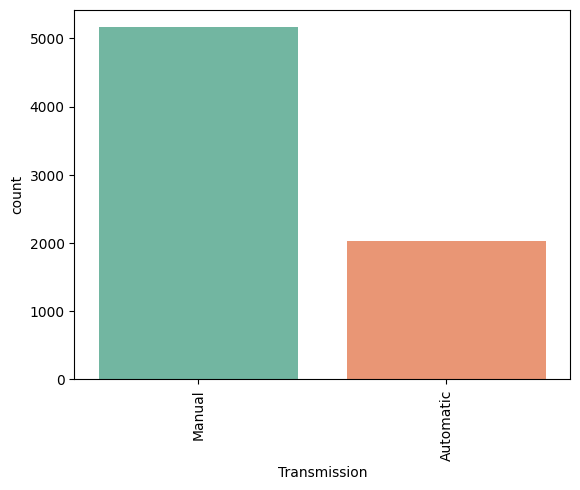

Owner_Type


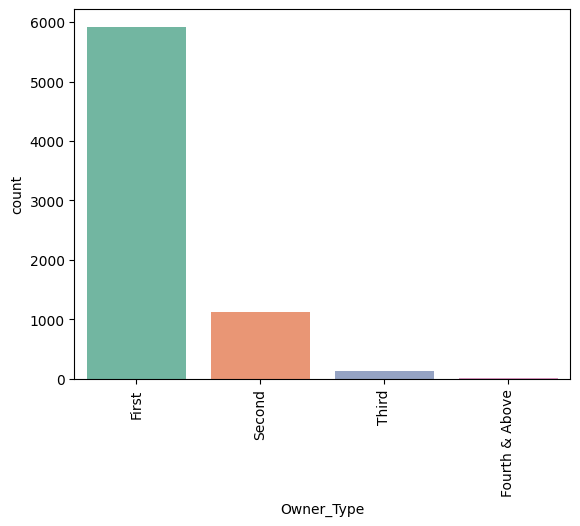

Brand


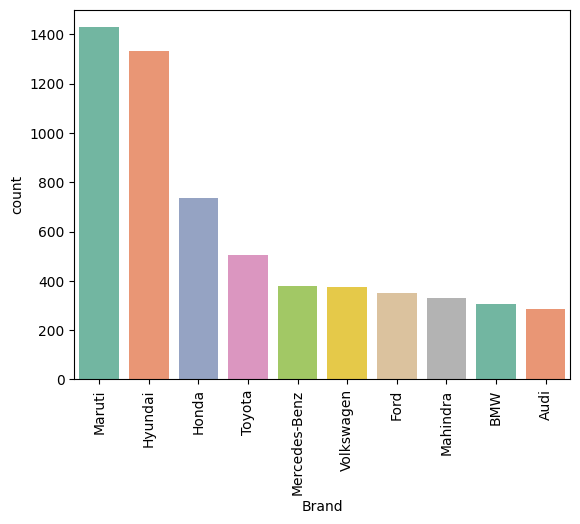

Model


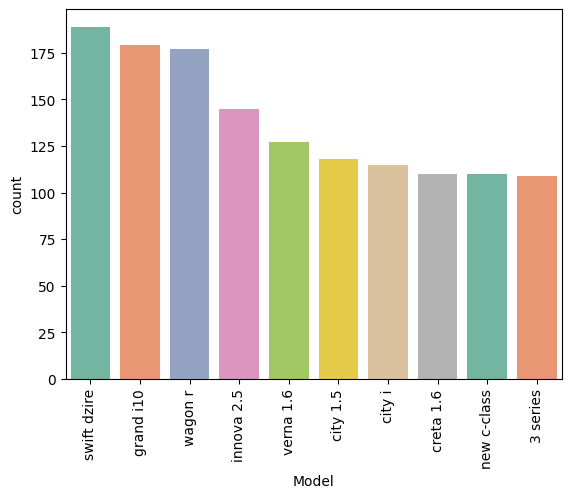

In [ ]:
for col in cat_cols: # Displaying the countplot of the categorical variables
    print(col)
    sns.countplot(x=col,data=data,order=data[col].value_counts().head(10).index,palette="Set2")
    plt.xticks(rotation=90)
    plt.show()

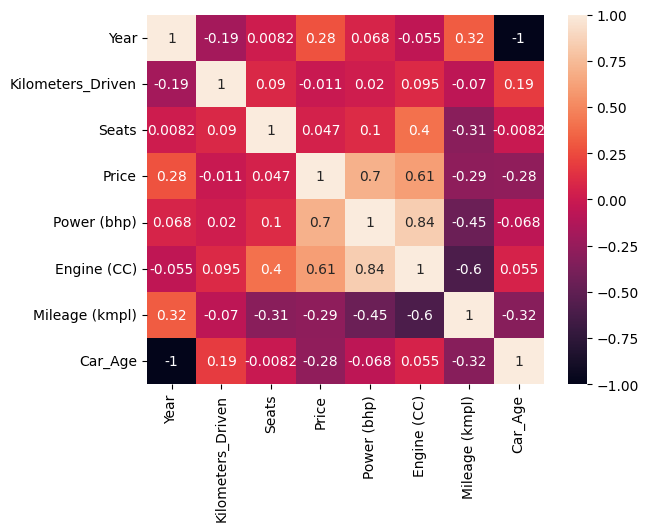

In [ ]:
corr=data[num_cols].corr() # Displaying the correlation matrix of the numerical variables
sns.heatmap(corr,annot=True)
plt.show()

data.columns

In [43]:
data.columns # Displaying the columns of the dataset

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Price', 'Power (bhp)',
       'Engine (CC)', 'Mileage (kmpl)', 'Car_Age', 'Brand', 'Model'],
      dtype='object')

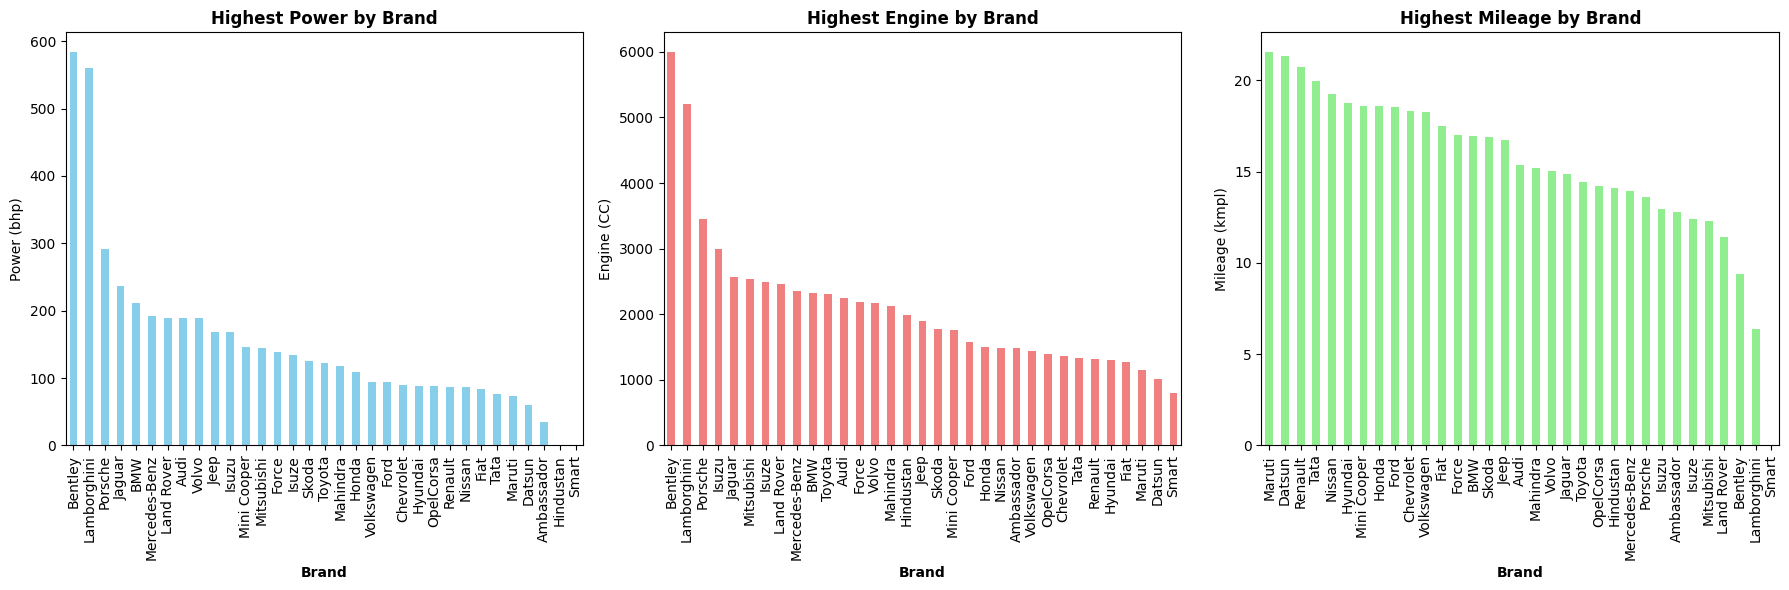

In [ ]:
power=data.groupby('Brand')['Power (bhp)'].mean().sort_values(ascending=False) # Displaying the mean of the column
engine=data.groupby('Brand')['Engine (CC)'].mean().sort_values(ascending=False)
mileage=data.groupby('Brand')['Mileage (kmpl)'].mean().sort_values(ascending=False) 

fig,ax=plt.subplots(1,3,figsize=(18,6))

power.plot(kind='bar',ax=ax[0],color='skyblue')
ax[0].set_title('Highest Power by Brand',fontweight='bold')
ax[0].set_ylabel('Power (bhp)')
ax[0].set_xlabel('Brand',fontweight='bold')

engine.plot(kind='bar',ax=ax[1],color='lightcoral')
ax[1].set_title('Highest Engine by Brand',fontweight='bold')
ax[1].set_ylabel('Engine (CC)')
ax[1].set_xlabel('Brand',fontweight='bold')

mileage.plot(kind='bar',ax=ax[2],color='lightgreen')
ax[2].set_title('Highest Mileage by Brand',fontweight='bold')
ax[2].set_ylabel('Mileage (kmpl)')
ax[2].set_xlabel('Brand',fontweight='bold')

plt.tight_layout() # Adjusting the layout
plt.show()

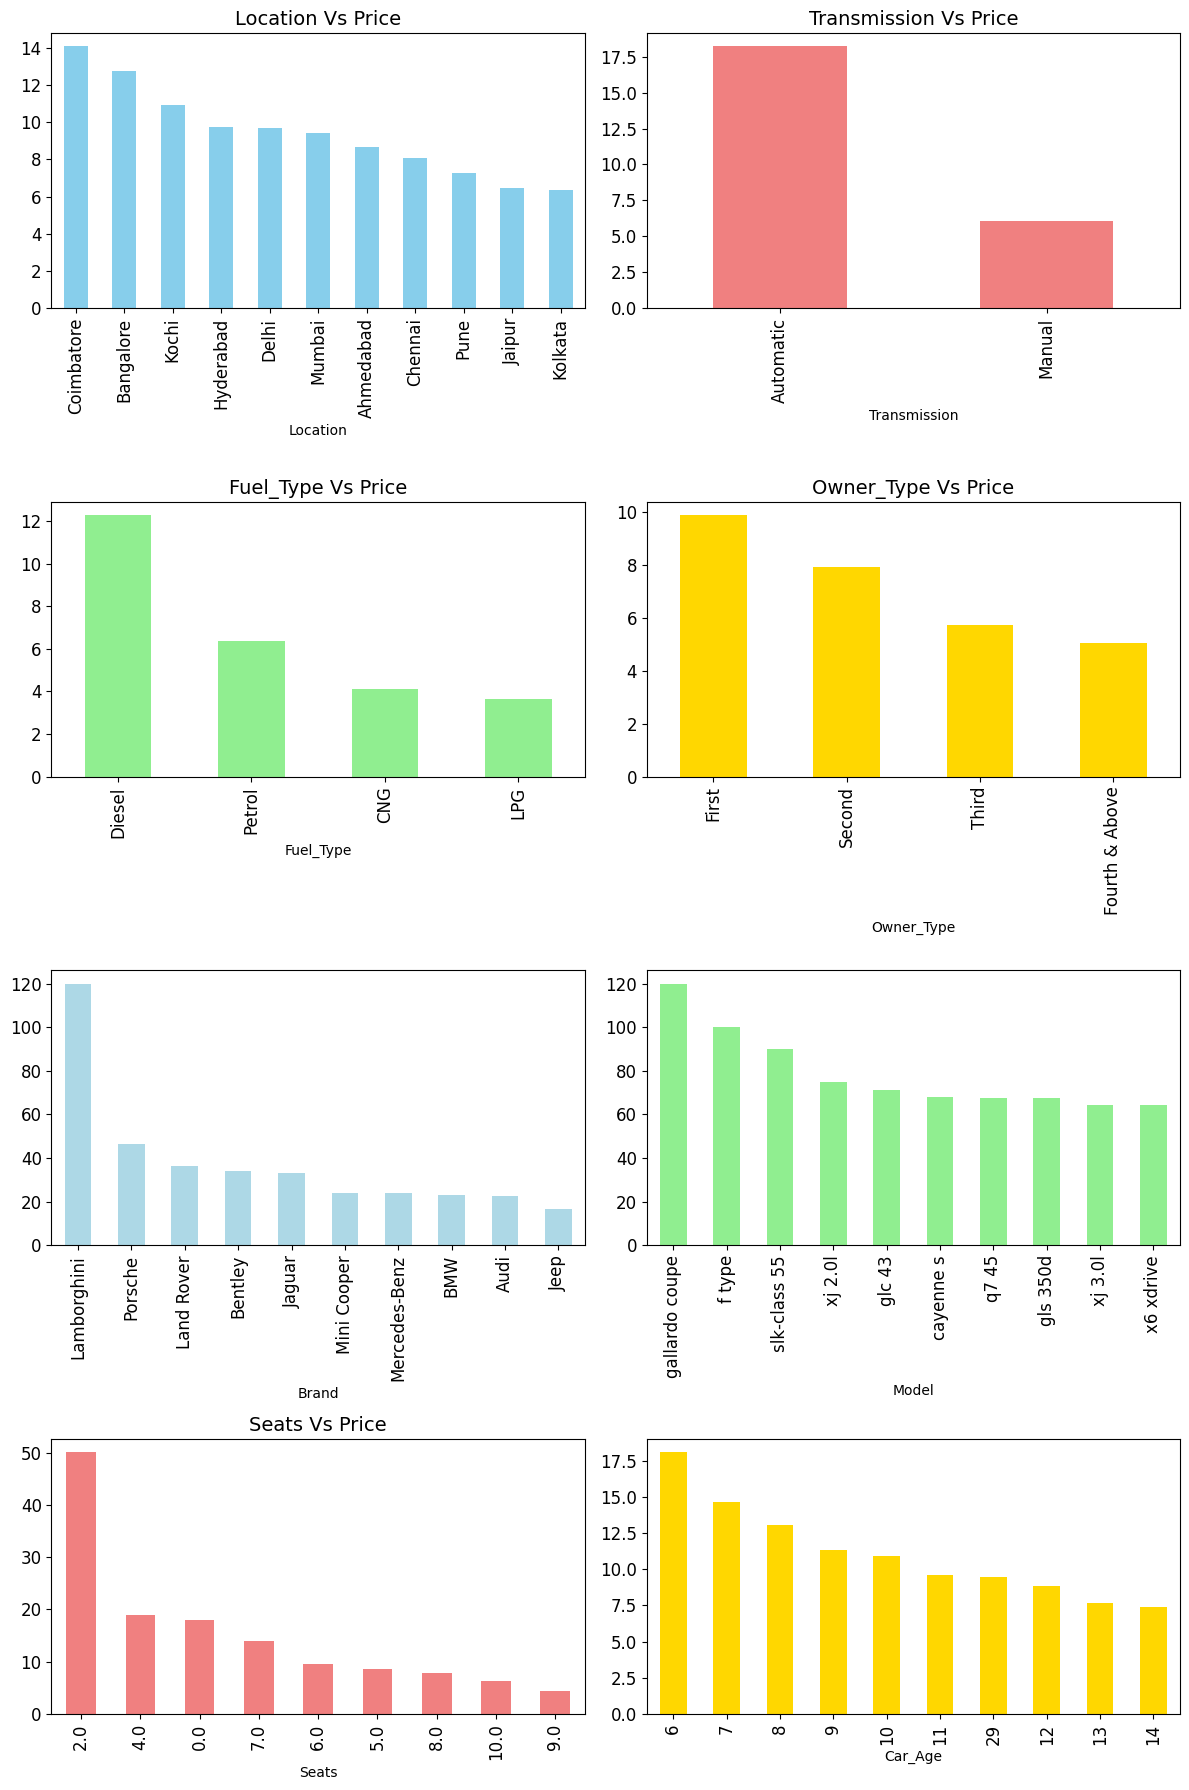

In [ ]:
feature=[
    ('Location','Location Vs Price','skyblue'),
    ('Transmission','Transmission Vs Price','lightcoral'),
    ('Fuel_Type','Fuel_Type Vs Price','lightgreen'),
    ('Owner_Type','Owner_Type Vs Price','gold'),
    ('Brand','Brand Vs price','lightblue'),
    ('Model','Model Vs Price','lightgreen'),
    ('Seats','Seats Vs Price','lightcoral'),
    ('Car_Age','Car_Age Vs Price ','gold')  
] 

fig,axarr=plt.subplots(4,2,figsize=(12,18))

for i ,(feature,title,color) in enumerate(feature): # Displaying the barplot of the categorical variables
    row,col=divmod(i,2)
    if feature in ['Brand','Model','Car_Age']:
        data.groupby(feature)['Price'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[row][col],fontsize=12,color=color)
    else:
        data.groupby(feature)['Price'].mean().sort_values(ascending=False).plot.bar(ax=axarr[row][col],fontsize=12,color=color)
        axarr[row][col].set_title(title,fontsize=14)
plt.tight_layout()
plt.show()